In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [6]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])


In [7]:
y = np.array([[0], [1], [1], [0]])

In [8]:
np.random.seed(0)

In [9]:
W1 = np.random.randn(2, 2)

In [10]:
b1 = np.zeros((1, 2))

In [11]:
W2 = np.random.randn(2, 1)

In [12]:
b2 = np.zeros((1, 1))

In [13]:
epochs = 10000
learning_rate = 0.1
losses = []

In [14]:
for i in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

In [15]:
loss = np.mean((y - a2) ** 2)
losses.append(loss)    

In [16]:
d_loss = 2 * (a2 - y)

In [17]:
d_z2 = d_loss * sigmoid_derivative(z2)

In [18]:
d_W2 = np.dot(a1.T, d_z2)

In [19]:
d_b2 = np.sum(d_z2, axis=0, keepdims=True)

In [20]:
d_a1 = np.dot(d_z2, W2.T)

In [21]:
d_z1 = d_a1 * sigmoid_derivative(z1)

In [22]:
d_W1 = np.dot(X.T, d_z1)

In [23]:
d_b1 = np.sum(d_z1, axis=0, keepdims=True)

In [24]:
W2 -= learning_rate * d_W2

In [25]:
b2 -= learning_rate * d_b2

In [26]:
W1 -= learning_rate * d_W1

In [27]:
b1 -= learning_rate * d_b1

In [28]:
if i % 2000 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

In [29]:
print("\nFinal predictions:")
print(np.round(a2, 3))


Final predictions:
[[0.609]
 [0.616]
 [0.733]
 [0.699]]


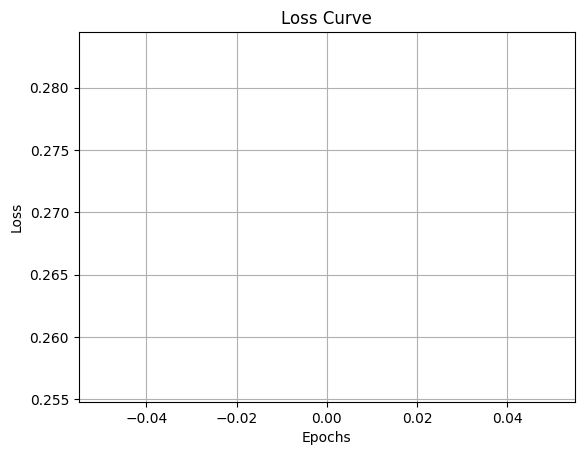

In [30]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()